In [1]:
import numpy as np 
import pandas as pd
import os
import cv2


In [2]:
from tensorflow.keras.utils import to_categorical

In [3]:
print(os.getcwd())

d:\Code\FaceMaskDetection\notebook


# Image preprocessing

In [4]:
data_dir = "d:\Code\FaceMaskDetection\dataset"


images, labels = [], []
categories = ["with_mask", "without_mask"]
for label, category in enumerate(categories):
    folder_path = os.path.join(data_dir, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(label)
images = np.array(images) / 255.0
labels = to_categorical(labels, num_classes=2)

In [5]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels, random_state=42)


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
labels[10]

array([1., 0.])

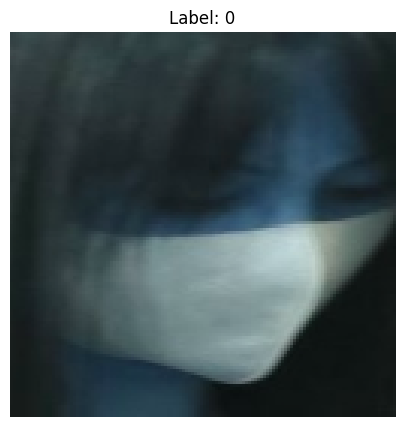

In [8]:
img_no = 654
img = images[img_no]  # Get the image at index 3123

plt.figure(figsize=(10, 5))
plt.imshow(img)  # Display the image (not img_no)
plt.title(f"Label: {np.argmax(labels[img_no])}")  # Use np.argmax to get the actual class from one-hot encoding
plt.axis('off')  # Hide axes for better visualization
plt.show()

# Model training


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [10]:
model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(2, activation='softmax')
    ])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,723,554 (14.20 MB)

 Trainable params: 3,723,554 (14.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
X=images
y=labels

In [13]:
history = model.fit(
    X, y,
    validation_split=0.2,         # Validation data
    epochs=10,                    # Maximum number of epochs
    batch_size=32,          # Batch size
)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 44s 211ms/step - accuracy: 0.7082 - loss: 0.5530 - val_accuracy: 0.8458 - val_loss: 0.3541
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.8692 - loss: 0.3194 - val_accuracy: 0.8941 - val_loss: 0.2529
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 207ms/step - accuracy: 0.9027 - loss: 0.2548 - val_accuracy: 0.9120 - val_loss: 0.2002
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 208ms/step - accuracy: 0.9154 - loss: 0.2111 - val_accuracy: 0.9021 - val_loss: 0.2731
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 209ms/step - accuracy: 0.9233 - loss: 0.1995 - val_accuracy: 0.9279 - val_loss: 0.1795
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 208ms/step - accuracy: 0.9418 - loss: 0.1498 - val_accuracy: 0.9279 - val_loss: 0.1867
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 208ms/step - accuracy: 0.9482 - loss: 0.1349 - val_accuracy: 0.9351 - val_loss: 0.1757
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 216ms/step - accuracy: 0.9564 - loss: 0

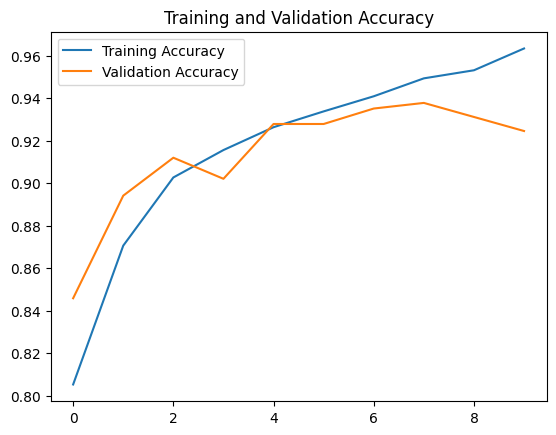

In [14]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [15]:
model_folder = "../models/notebook_trained_model(val_acc:93%).h5"
model.save(model_folder)

# Testing model

In [16]:
from tensorflow.keras.models import load_model

In [17]:
def detect_mask(frame, model):
    img = cv2.resize(frame, (128, 128)) / 255.0
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)[0]
    return "No Mask" if pred[0] > pred[1] else "Mask"


In [18]:
model = load_model("../models/notebook_trained_model(val_acc:93%).h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


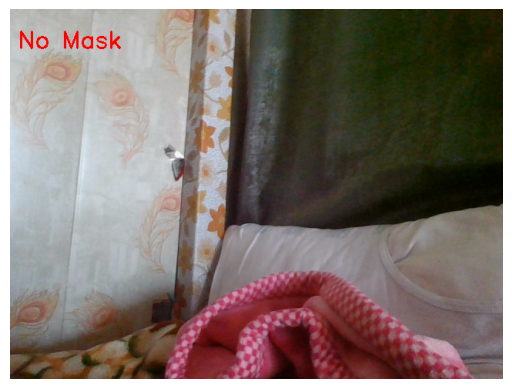

In [19]:
cap = cv2.VideoCapture(0)

try:
    for _ in range(100):  # Set a limit to iterations to avoid infinite loop
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame. Exiting.")
            break

        # Detect mask and annotate the frame
        label = detect_mask(frame, model)
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)
        cv2.putText(frame, label, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

        # Convert frame to RGB for matplotlib
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display the frame in the notebook
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.show()

        # Clear the output before showing the next frame
        from IPython.display import clear_output
        clear_output(wait=True)
finally:
    cap.release()